# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [ ]:
#cat_features = data.select_dtypes(include=["object"]).columns
#num_features = data.select_dtypes(include=["int64", "float64"]).columns
#cat_imputer = SimpleImputer(strategy="most_frequent")
#num_imputer = SimpleImputer(strategy="mean")

#data[cat_features] = cat_imputer.fit_transform(data[cat_features])
#data[num_features] = num_imputer.fit_transform(data[num_features])

#missing values
#missing_values = data.isnull().sum()
#missing_values


In [3]:
# incepem prin a verifica primele 5 randuri din setul de date 
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [4]:
#mai apoi, verificam dimensiunea setului de date, pe coloane si pe randuri
print(f"Setul de date conține {data.shape[0]} rânduri și {data.shape[1]} coloane.")

Setul de date conține 32561 rânduri și 15 coloane.


In [8]:
# verificam daca avem valori lipsa
print(data.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [9]:
# si verificam tipurile de date din fiecare coloana 
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [10]:
# de obicei, coloanele care sunt de tip categoric, au valori lipsa
# pentru asta verificam inca odata daca avem valori lipsa pe fiecare coloana
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [11]:
# pentru fiecare valoare lipsa, vom inlocui cu "Necunoscut"
categorical_columns = ["workclass", "occupation", "native-country"]
data[categorical_columns] = data[categorical_columns].fillna("Necunoscut")

In [12]:
# verificam sa fie in regula datele dupa inlocuire
print(data.isnull().sum().sum())

0


In [13]:
# pare sa fie bine, deci trecem la urmatorul pas, si anume acela de a verifica duplicatele
duplicates = data.duplicated().sum()
print(duplicates)

24


In [14]:
# observam ca avem 24 de date duplicate, asadar, pentru a curata setul de date, le vom sterge
data = data.drop_duplicates()

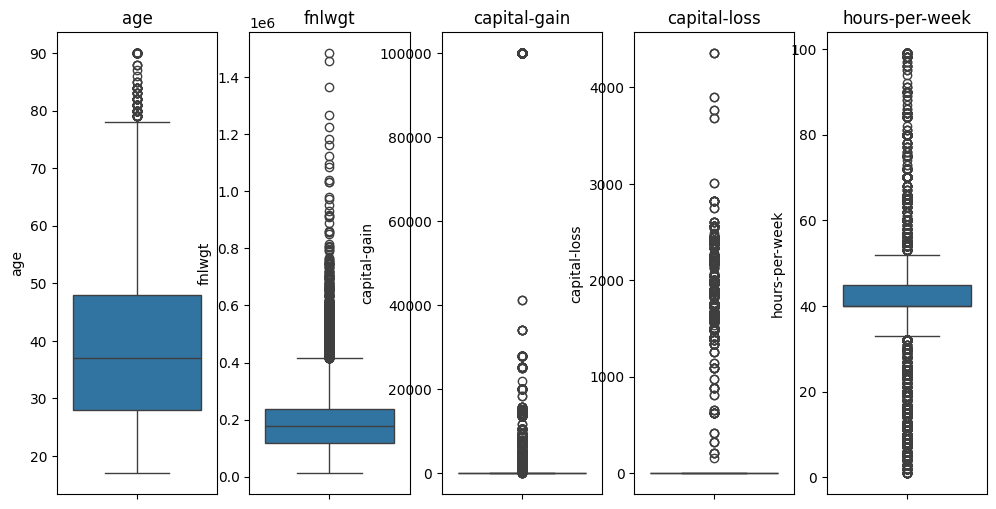

In [15]:
# urmatorul pas ar fi gasirea si procesarea de outliers 
# pentru asta, putem crea un boxplot in vederea observarii distributiei variabilelor numerice 

def plot_boxplots(data, columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.boxplot(y=data[col])
        plt.title(col)
    plt.show()

# cream si o Lista cu coloanele numerice, unde verificăm outlierii
num_columns = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]

plot_boxplots(data, num_columns)

In [16]:
#pentru a observa valorile numerice ale outliers

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

for col in num_columns:
    outliers = detect_outliers_iqr(data, col)
    print(f"{col}: {len(outliers)} outliers")


age: 142 outliers
fnlwgt: 993 outliers
capital-gain: 2712 outliers
capital-loss: 1519 outliers
hours-per-week: 9002 outliers


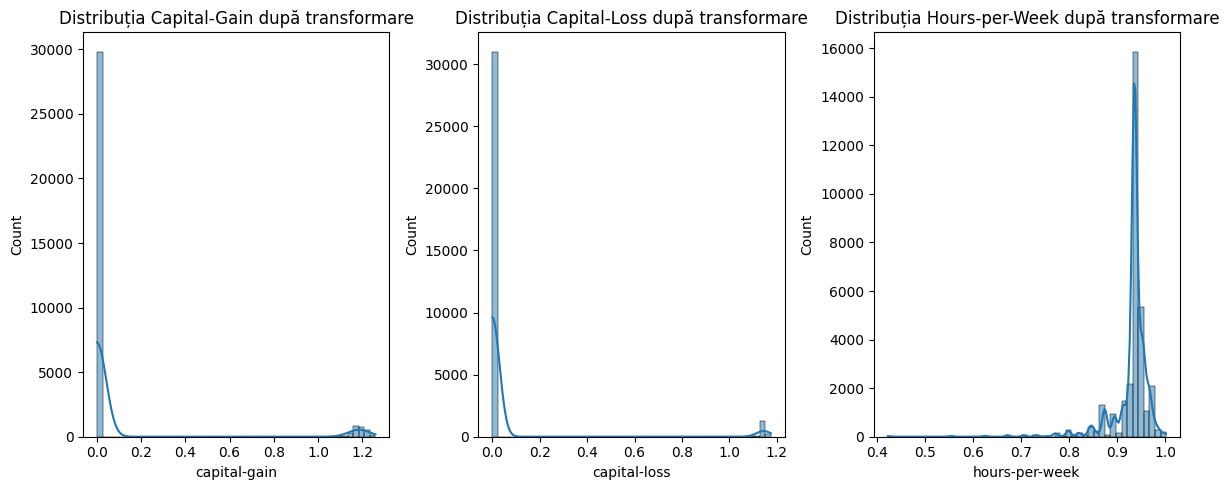

In [19]:
# evident, avem foarte multi outliers la cateva variabile
# sa le stergem, nu e solutia ideala, asadar putem sa logaritmam 

# logaritmam pentru a reduce impactul valorilor extreme
data["capital-gain"] = np.log1p(data["capital-gain"]) 
data["capital-loss"] = np.log1p(data["capital-loss"])
data["hours-per-week"] = np.log1p(data["hours-per-week"])

# Verificăm distribuția după transformare
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.histplot(data["capital-gain"], bins=50, kde=True)
plt.title("Distribuția Capital-Gain după transformare")

plt.subplot(1, 3, 2)
sns.histplot(data["capital-loss"], bins=50, kde=True)
plt.title("Distribuția Capital-Loss după transformare")

plt.subplot(1, 3, 3)
sns.histplot(data["hours-per-week"], bins=50, kde=True)
plt.title("Distribuția Hours-per-Week după transformare")

plt.tight_layout()
plt.show()


In [28]:
#verificam daca logaritmarea pe variabila principala s-a facut corect
print(data['hours-per-week'].head())  

0    0.936268
1    0.829305
2    0.936268
3    0.936268
4    0.936268
Name: hours-per-week, dtype: float64


In [29]:
# Verificam valoarea minima pentru a nu avea valori 0 sau NaN
print(data['hours-per-week'].min())

0.423035857164402


In [20]:
#acum ca am terminat cu procesarea si imbunatatirea datelor, incepe partea de train si test si antrenarea modelului
#voi imparti datele in 80% pentru train si 20% pentru test

from sklearn.model_selection import train_test_split

X = data.drop("hours-per-week", axis=1) 
y = data["hours-per-week"] 

# seturi de antrenament-train (80%) și test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dimensiunile seturilor de date
print(f"Dimensiunea setului de antrenament: {X_train.shape}")
print(f"Dimensiunea setului de test: {X_test.shape}")


Dimensiunea setului de antrenament: (26029, 14)
Dimensiunea setului de test: (6508, 14)


### aici avem pentru setul de antrenament 26029 de randuri si 14 coloane, iar pentru setul de test avem 6508 randuri si 14 coloane

### e important sa evaluam performanta pentru setul de test, deoarece cu el se generalizeaza modelul pentru datele necunoscute, folosite in setul de test. Aici avem ca indicatori cheie MSE-ul si R patrat

### daca avem o performanta buna la setul de antrenament, dar mai slaba la test atunct putem avea OVERFITTING - unde sunt sanse ca modelul de antrenament sa fi invatat prea bine detaliile datelor, nemaiputand sa generalizeze

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

categorical_columns = ["workclass", "occupation", "native-country", "education", "marital-status", "relationship", "race", "sex"]

numeric_columns = ["age", "fnlwgt", "capital-gain", "capital-loss", "hours-per-week"]


X = data.drop(columns=["hours-per-week", "income"])
y = data["hours-per-week"]

# OneHotEncoder pe coloanele categorice
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(sparse_output=False), categorical_columns)],
    remainder='passthrough'
)

# Impartirea datelor în set de antrenament si set de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', DecisionTreeRegressor(random_state=42)) 
])

# Antrenarea modelului
model_pipeline.fit(X_train, y_train)

# Predictii pe setul de test
y_pred = model_pipeline.predict(X_test)

# Evaluarea performantei modelului prin calcularea MSE si R patrat
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r_patrat = r2_score(y_test, y_pred)
print(f"R_patrat: {r_patrat}")


Mean Squared Error (MSE): 0.0025444543319834622
R_patrat: -0.6670986694951391


## DECISION TREE